# Movies Recommender System

This is an updated version over the previous recommender system hosted in this repository. In this notebook we shall explore a bigger data set with interactive analysis followed by various Recommender systems. The notebook is divided into two main sections as follows;

1. Exploratory Data Analysis 
2. Recommender Systems

**Note**: This notebook will be updated to the latest changes to the [The Movies Dataset at Kaggle](https://www.kaggle.com/rounakbanik/the-movies-dataset) dataset.

## Walk through
The notebook follows the latest jupyter syntax. 
There are hidden cells in the notebook which can be revealed by toggling - `Show Code` button.


In [1]:
%matplotlib inline
from IPython.display import Image, HTML
import json
import datetime
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
sns.set(font_scale=1.25)
pd.set_option('display.max_colwidth', 50)

In [2]:
meta_data = pd.read_csv('./data/movies_metadata.csv')
meta_data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


## Exploratory Data Analysis

In [3]:
meta_data.shape

(45466, 24)

In [4]:
# Inspect meta_data set
inspect_meta_data = pd.DataFrame({'Dtype': meta_data.dtypes, 'Unique values': meta_data.nunique() ,
             'Number of Missing values': meta_data.isnull().sum() ,
              'Percentage Missing': (meta_data.isnull().sum() / len(meta_data)) * 100
             }).sort_values(by='Number of Missing values',ascending = False)

In [5]:
inspect_meta_data

,Dtype,Number of Missing values,Percentage Missing,Unique values
belongs_to_collection,object,40972,90.115691,1698
homepage,object,37684,82.883913,7673
tagline,object,25054,55.104914,20283
overview,object,954,2.098271,44307
poster_path,object,386,0.848986,45024
runtime,float64,263,0.578454,353
status,object,87,0.191352,6
release_date,object,87,0.191352,17336
imdb_id,object,17,0.037391,45417
original_language,object,11,0.024194,92


In [6]:
meta_data = meta_data.drop(['imdb_id'], axis=1)
meta_data[meta_data['original_title'] != meta_data['title']][['title', 'original_title']].head()
meta_data = meta_data.drop('original_title', axis=1)
meta_data['revenue'] = meta_data['revenue'].replace(0, np.nan)
meta_data['budget'] = pd.to_numeric(meta_data['budget'], errors='coerce')
meta_data['budget'] = meta_data['budget'].replace(0, np.nan)
meta_data['return'] = meta_data['revenue'] / meta_data['budget']
meta_data['year'] = pd.to_datetime(meta_data['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
meta_data['month'] = pd.to_datetime(meta_data['release_date'], errors='coerce').dt.month

In [7]:
meta_data['title'] = meta_data['title'].astype('str')
meta_data['overview'] = meta_data['overview'].astype('str')

In [8]:
title_corpus = ' '.join(meta_data['title'])
overview_corpus = ' '.join(meta_data['overview'])

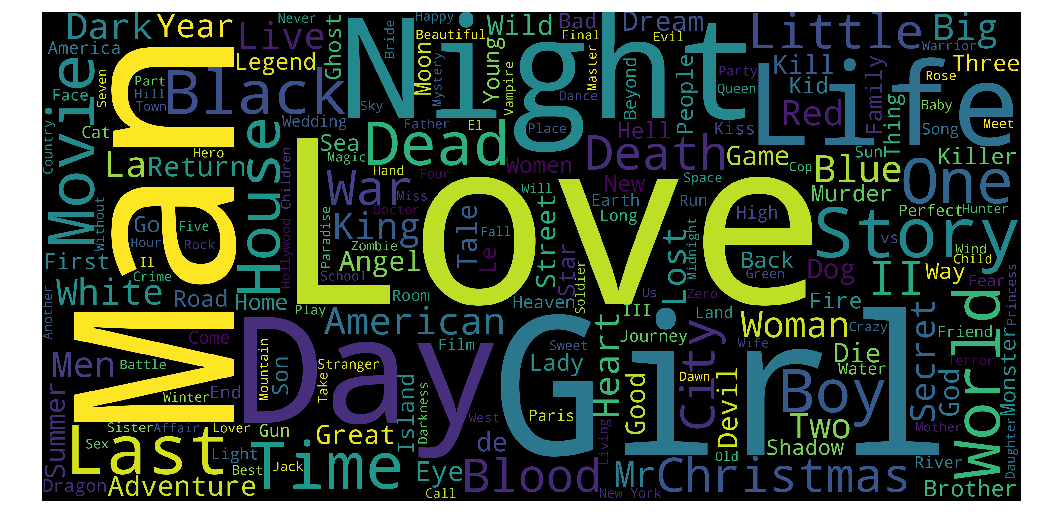

In [9]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(20,9))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

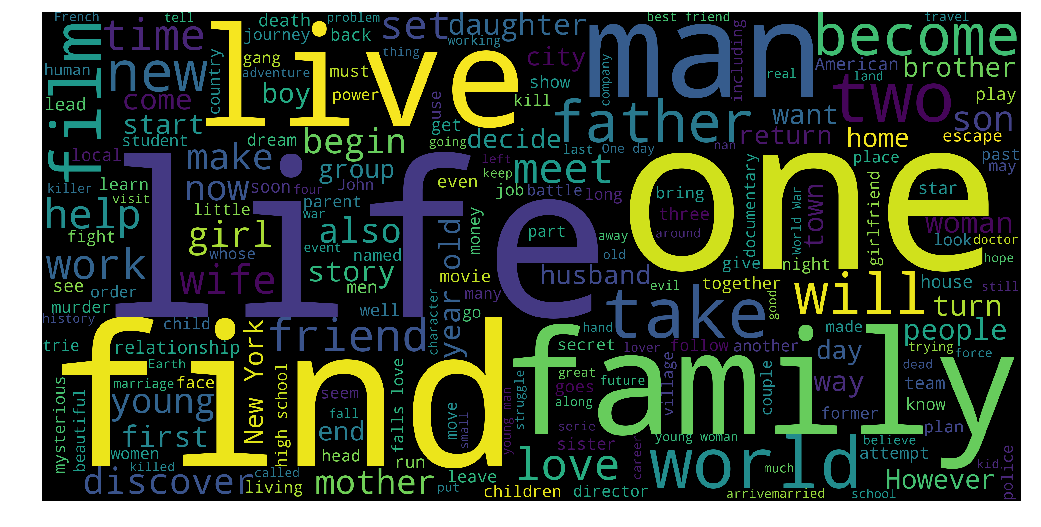

In [10]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(20,9))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

In [12]:
def convert_numeric(x):
    try:
        return float(x)
    except:
        return np.nan
meta_data['popularity'] = meta_data['popularity'].apply(convert_numeric).astype('float')
meta_data['vote_count'] = meta_data['vote_count'].apply(convert_numeric).astype('float')
meta_data['vote_average'] = meta_data['vote_average'].apply(convert_numeric).astype('float')

In [13]:
meta_data[['title', 'popularity', 'year']].sort_values('popularity', ascending=False).head(20)

,title,popularity,year
30700,Minions,547.488298,2015
33356,Wonder Woman,294.337037,2017
42222,Beauty and the Beast,287.253654,2017
43644,Baby Driver,228.032744,2017
24455,Big Hero 6,213.849907,2014
26564,Deadpool,187.860492,2016
26566,Guardians of the Galaxy Vol. 2,185.330992,2017
14551,Avatar,185.070892,2009
24351,John Wick,183.870374,2014
23675,Gone Girl,154.801009,2014


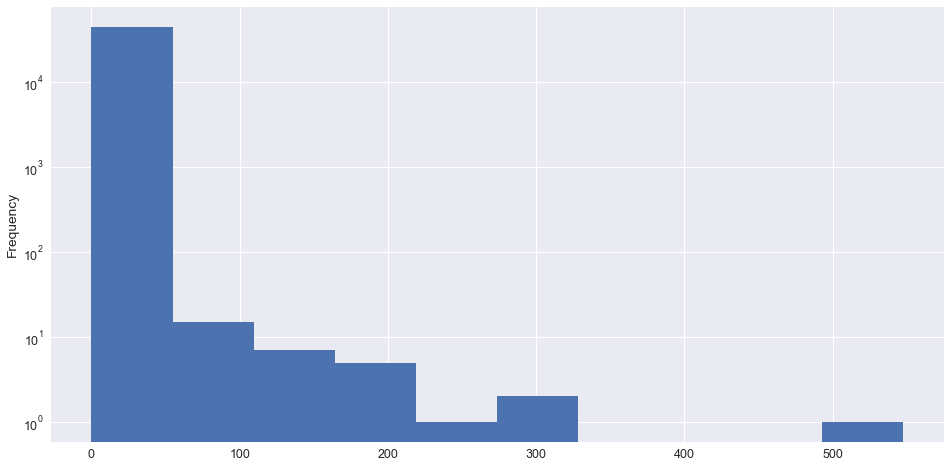

In [14]:
plt.figure(figsize=(16,8))
meta_data['popularity'].plot(logy=True, kind='hist')

In [15]:
meta_data[['title', 'vote_count', 'year']].sort_values('vote_count', ascending=False).head(20)

,title,vote_count,year
15480,Inception,14075.0,2010
12481,The Dark Knight,12269.0,2008
14551,Avatar,12114.0,2009
17818,The Avengers,12000.0,2012
26564,Deadpool,11444.0,2016
22879,Interstellar,11187.0,2014
20051,Django Unchained,10297.0,2012
23753,Guardians of the Galaxy,10014.0,2014
2843,Fight Club,9678.0,1999
18244,The Hunger Games,9634.0,2012


(-4, 12)

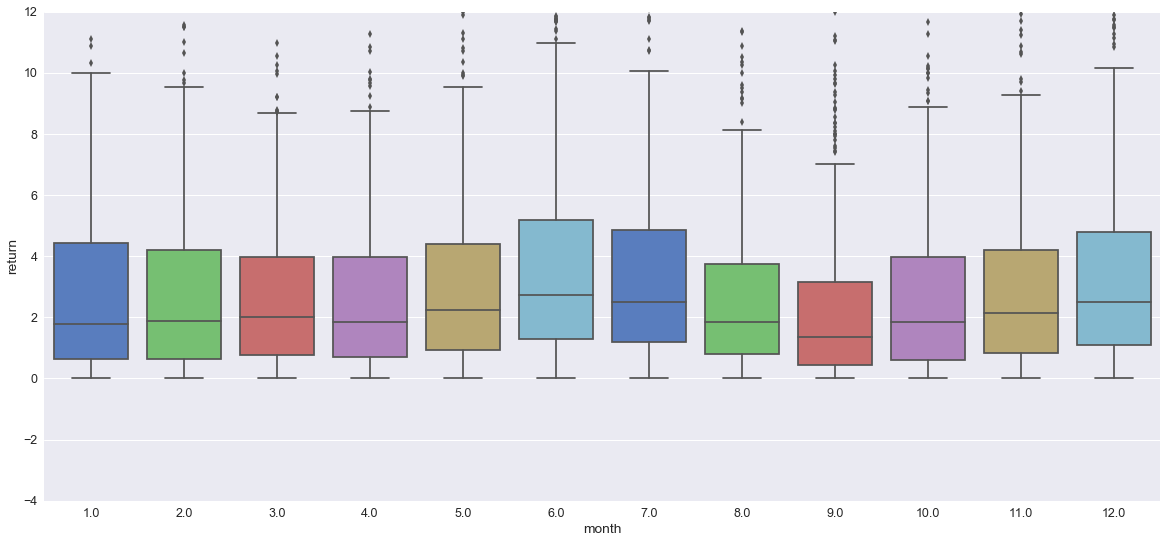

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(20,9))
sns.boxplot(x='month', y='return', data=meta_data[meta_data['return'].notnull()], palette="muted", ax =ax)
ax.set_ylim([-4, 12])

In [18]:
gross_top = meta_data[[ 'title', 'budget', 'revenue', 'year']].sort_values('revenue', ascending=False).head(10)
pd.set_option('display.max_colwidth', 100)
HTML(gross_top.to_html(escape=False))

,title,budget,revenue,year
14551,Avatar,237000000.0,2.787965e+09,2009
26555,Star Wars: The Force Awakens,245000000.0,2.068224e+09,2015
1639,Titanic,200000000.0,1.845034e+09,1997
17818,The Avengers,220000000.0,1.519558e+09,2012
25084,Jurassic World,150000000.0,1.513529e+09,2015
28830,Furious 7,190000000.0,1.506249e+09,2015
26558,Avengers: Age of Ultron,280000000.0,1.405404e+09,2015
17437,Harry Potter and the Deathly Hallows: Part 2,125000000.0,1.342000e+09,2011
22110,Frozen,150000000.0,1.274219e+09,2013
42222,Beauty and the Beast,160000000.0,1.262886e+09,2017


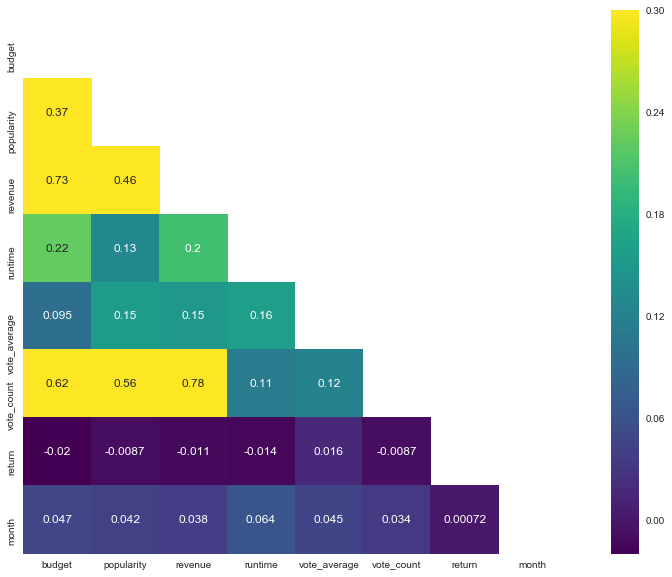

In [19]:
sns.set(font_scale=1)
mask = np.zeros_like(meta_data.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(16,10))
    ax = sns.heatmap(meta_data.corr(), cmap='viridis', mask=mask, vmax=.3, square=True, annot=True)

# Recommendation Engine

In practice, recommendation engines are of three kinds:
 1. **Popularity-based** engines: Usually the most simple to implement be also the most impersonal
 2. **Content-based** engines: The recommendations are based on the description of the products
 3. **Collaborative filtering** engines: Records from various users provide recommendations based on user similarities
 
 
 
1. Basic functioning of the engine 
    * 1.1 Similarity
    * 1.2 Popularity
2. Definition of the recommendation engine functions
3. Making meaningfull recommendations


## A Simple Recommener Engine
The Simple Recommender offers generalized recommnendations to every user based on movie popularity and (sometimes) genre. The basic idea behind this recommender is that movies that are more popular and more critically acclaimed will have a higher probability of being liked by the average audience. This model does not give personalized recommendations based on the user. 

The implementation of this model is extremely trivial. All we have to do is sort our movies based on ratings and popularity and display the top movies of our list. As an added step, we can pass in a genre argument to get the top movies of a particular genre. 

In [20]:
from ast import literal_eval
md = pd. read_csv('./data/movies_metadata.csv')
md['genres'] = md['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
md.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg',...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear o...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an enchanted board game that opens the door to a magical w...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}]",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


I use the TMDB Ratings to come up with our **Top Movies Chart.** I will use IMDB's *weighted rating* formula to construct my chart. Mathematically, it is represented as follows:

Weighted Rating (WR) = $(\frac{v}{v + m} . R) + (\frac{m}{v + m} . C)$

where,
* *v* is the number of votes for the movie
* *m* is the minimum votes required to be listed in the chart
* *R* is the average rating of the movie
* *C* is the mean vote across the whole report

The next step is to determine an appropriate value for *m*, the minimum votes required to be listed in the chart. We will use **95th percentile** as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 95% of the movies in the list.

I will build our overall Top 250 Chart and will define a function to build charts for a particular genre. Let's begin!

In [21]:
vote_counts = md[md['vote_count'].notnull()]['vote_count'].astype('int')
vote_averages = md[md['vote_average'].notnull()]['vote_average'].astype('int')
C = vote_averages.mean()
print ("Vote Count Average Mean:   "  , C)
m = vote_counts.quantile(0.95)
print ("Vote Count Quantile 0.95:  ", m)

Vote Count Average Mean:    5.244896612406511
Vote Count Quantile 0.95:   434.0


In [22]:
md['year'] = pd.to_datetime(md['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

qualified = md[(md['vote_count'] >= m) & (md['vote_count'].notnull()) & (md['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity', 'genres']]
qualified['vote_count'] = qualified['vote_count'].astype('int')
qualified['vote_average'] = qualified['vote_average'].astype('int')
qualified.describe()

,vote_count,vote_average
count,2274.000000,2274.000000
mean,1582.002199,6.159631
std,1570.502308,0.839273
min,434.000000,2.000000
25%,628.000000,6.000000
50%,984.000000,6.000000
75%,1831.000000,7.000000
max,14075.000000,9.000000


Therefore, to qualify to be considered for the chart, a movie has to have at least **434 votes** on TMDB. We also see that the average rating for a movie on TMDB is **5.244** on a scale of 10. **2274** 
And, Movies qualify to be on our chart.


In [23]:
def weighted_rating(x):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

qualified['wr'] = qualified.apply(weighted_rating, axis=1)

In [24]:
qualified = qualified.sort_values('wr', ascending=False).head(250)
qualified

,title,year,vote_count,vote_average,popularity,genres,wr
15480,Inception,2010,14075,8,29.1081,"[Action, Thriller, Science Fiction, Mystery, Adventure]",7.917588
12481,The Dark Knight,2008,12269,8,123.167,"[Drama, Action, Crime, Thriller]",7.905871
22879,Interstellar,2014,11187,8,32.2135,"[Adventure, Drama, Science Fiction]",7.897107
2843,Fight Club,1999,9678,8,63.8696,[Drama],7.881753
4863,The Lord of the Rings: The Fellowship of the Ring,2001,8892,8,32.0707,"[Adventure, Fantasy, Action]",7.871787
292,Pulp Fiction,1994,8670,8,140.95,"[Thriller, Crime]",7.868660
314,The Shawshank Redemption,1994,8358,8,51.6454,"[Drama, Crime]",7.864000
7000,The Lord of the Rings: The Return of the King,2003,8226,8,29.3244,"[Adventure, Fantasy, Action]",7.861927
351,Forrest Gump,1994,8147,8,48.3072,"[Comedy, Drama, Romance]",7.860656
5814,The Lord of the Rings: The Two Towers,2002,7641,8,29.4235,"[Adventure, Fantasy, Action]",7.851924


In [25]:
s = md.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
gen_md = md.drop('genres', axis=1).join(s)

In [26]:
def build_chart(genre, percentile=0.85):
    df = gen_md[gen_md['genre'] == genre]
    vote_counts = df[df['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = df[df['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(percentile)
    qualified = df[(df['vote_count'] >= m) & (df['vote_count'].notnull()) & (df['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity']]
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')
    qualified['wr'] = qualified.apply(lambda x: (x['vote_count']/(x['vote_count']+m) * x['vote_average']) + (m/(m+x['vote_count']) * C), axis=1)
    qualified = qualified.sort_values('wr', ascending=False).head(250)
    return qualified

## Top Action Movies

In [27]:
build_chart('Action').head(15)

,title,year,vote_count,vote_average,popularity,wr
15480,Inception,2010,14075,8,29.1081,7.955099
12481,The Dark Knight,2008,12269,8,123.167,7.948610
4863,The Lord of the Rings: The Fellowship of the Ring,2001,8892,8,32.0707,7.929579
7000,The Lord of the Rings: The Return of the King,2003,8226,8,29.3244,7.924031
5814,The Lord of the Rings: The Two Towers,2002,7641,8,29.4235,7.918382
256,Star Wars,1977,6778,8,42.1497,7.908327
1154,The Empire Strikes Back,1980,5998,8,19.471,7.896841
4135,Scarface,1983,3017,8,11.2997,7.802046
9430,Oldboy,2003,2000,8,10.6169,7.711649
1910,Seven Samurai,1954,892,8,15.0178,7.426145


## Top Sci-Fi Movies

In [28]:
build_chart('Science Fiction').head(15)

,title,year,vote_count,vote_average,popularity,wr
15480,Inception,2010,14075,8,29.1081,7.939069
22879,Interstellar,2014,11187,8,32.2135,7.923728
256,Star Wars,1977,6778,8,42.1497,7.876106
1225,Back to the Future,1985,6239,8,25.7785,7.865868
1154,The Empire Strikes Back,1980,5998,8,19.471,7.860722
1163,A Clockwork Orange,1971,3432,8,17.1126,7.764533
1901,Metropolis,1927,666,8,14.4879,7.078592
14551,Avatar,2009,12114,7,185.071,6.952299
17818,The Avengers,2012,12000,7,89.8876,6.951856
23753,Guardians of the Galaxy,2014,10014,7,53.2916,6.942571


## Top Animated Movies

In [29]:
build_chart('Animation').head(15)

,title,year,vote_count,vote_average,popularity,wr
359,The Lion King,1994,5520,8,21.6058,7.909339
5481,Spirited Away,2001,3968,8,41.0489,7.875933
9698,Howl's Moving Castle,2004,2049,8,16.136,7.772103
2884,Princess Mononoke,1997,2041,8,17.1667,7.771305
5833,My Neighbor Totoro,1988,1730,8,13.5073,7.735274
40251,Your Name.,2016,1030,8,34.461252,7.589820
5553,Grave of the Fireflies,1988,974,8,0.010902,7.570962
19901,Paperman,2012,734,8,7.19863,7.465676
39386,Piper,2016,487,8,11.243161,7.285132
20779,Wolf Children,2012,483,8,10.2495,7.281198


## Content Based Recommender

The recommender we built in the previous section suffers some severe limitations. For one, it gives the same recommendation to everyone, regardless of the user's personal taste. If a person who loves romantic movies (and hates action) were to look at our Top 15 Chart, s/he wouldn't probably like most of the movies. If s/he were to go one step further and look at our charts by genre, s/he wouldn't still be getting the best recommendations.

For instance, consider a person who loves *Dilwale Dulhania Le Jayenge*, *My Name is Khan* and *Kabhi Khushi Kabhi Gham*. One inference we can obtain is that the person loves the actor Shahrukh Khan and the director Karan Johar. Even if s/he were to access the romance chart, s/he wouldn't find these as the top recommendations.

To personalise our recommendations more, I am going to build an engine that computes similarity between movies based on certain metrics and suggests movies that are most similar to a particular movie that a user liked. Since we will be using movie metadata (or content) to build this engine, this also known as **Content Based Filtering.**

I will build two Content Based Recommenders based on:
* Movie Overviews and Taglines
* Movie Cast, Crew, Keywords and Genre

Also, as mentioned in the introduction, I will be using a subset of all the movies available to us due to limiting computing power available to me. 

In [30]:
links_small = pd.read_csv('./data/links_small.csv')
links_small = links_small[links_small['tmdbId'].notnull()]['tmdbId'].astype('int')
md = md.drop([19730, 29503, 35587])
md['id'] = md['id'].astype('int')

In [31]:
smd = md[md['id'].isin(links_small)]
smd.shape

(9099, 25)

In [32]:
smd['tagline'] = smd['tagline'].fillna('')
smd['description'] = smd['overview'] + smd['tagline']
smd['description'] = smd['description'].fillna('')

In [33]:
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from surprise import Reader, Dataset, SVD, evaluate
import warnings; warnings.simplefilter('ignore')

tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(smd['description'])

#### Cosine Similarity

I will be using the Cosine Similarity to calculate a numeric quantity that denotes the similarity between two movies. Mathematically, it is defined as follows:

$cosine(x,y) = \frac{x. y^\intercal}{||x||.||y||} $

Since we have used the TF-IDF Vectorizer, calculating the Dot Product will directly give us the Cosine Similarity Score. Therefore, we will use sklearn's **linear_kernel** instead of cosine_similarities since it is much faster.

In [34]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

 We now have a pairwise cosine similarity matrix for all the movies in our dataset. The next step is to write a function that returns the 30 most similar movies based on the cosine similarity score.

In [38]:
smd = smd.reset_index()
titles = smd['title']
indices = pd.Series(smd.index, index=smd['title'])

def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return pd.DataFrame(titles.iloc[movie_indices])

In [39]:
get_recommendations('The Godfather').head(10)

,title
973,The Godfather: Part II
8387,The Family
3509,Made
4196,Johnny Dangerously
29,Shanghai Triad
5667,Fury
2412,American Movie
1582,The Godfather: Part III
4221,8 Women
2159,Summer of Sam


In [40]:
get_recommendations('The Dark Knight').head(10)

,title
7931,The Dark Knight Rises
132,Batman Forever
1113,Batman Returns
8227,"Batman: The Dark Knight Returns, Part 2"
7565,Batman: Under the Red Hood
524,Batman
7901,Batman: Year One
2579,Batman: Mask of the Phantasm
2696,JFK
8165,"Batman: The Dark Knight Returns, Part 1"


Now, thats a pattern. We could observe the **Batman** Movies all in one place here. And as matter of fact I love the **Batmat Triology <3**

### Metadata Based Recommender

To build our standard metadata based content recommender, we will need to merge our current dataset with the crew and the keyword datasets. Let us prepare this data as our first step.

In [41]:
credits = pd.read_csv('./data/credits.csv')
keywords = pd.read_csv('./data/keywords.csv')
keywords['id'] = keywords['id'].astype('int')
credits['id'] = credits['id'].astype('int')
md['id'] = md['id'].astype('int')
md = md.merge(credits, on='id')
md = md.merge(keywords, on='id')

We now have our cast, crew, genres and credits, all in one dataframe. Let us wrangle this a little more using the following intuitions:

1. **Crew:** From the crew, we will only pick the director as our feature since the others don't contribute that much to the *feel* of the movie.
2. **Cast:** Choosing Cast is a little more tricky. Lesser known actors and minor roles do not really affect people's opinion of a movie. Therefore, we must only select the major characters and their respective actors. Arbitrarily we will choose the top 3 actors that appear in the credits list. 

In [44]:
smd = md[md['id'].isin(links_small)]
smd['cast'] = smd['cast'].apply(literal_eval)
smd['crew'] = smd['crew'].apply(literal_eval)
smd['keywords'] = smd['keywords'].apply(literal_eval)
smd['cast_size'] = smd['cast'].apply(lambda x: len(x))
smd['crew_size'] = smd['crew'].apply(lambda x: len(x))

In [45]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [46]:
smd['director'] = smd['crew'].apply(get_director)
smd['cast'] = smd['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
smd['cast'] = smd['cast'].apply(lambda x: x[:3] if len(x) >=3 else x)
smd['keywords'] = smd['keywords'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

What I plan on doing is creating a metadata dump for every movie which consists of **genres, director, main actors and keywords.** I then use a **Count Vectorizer** to create our count matrix as we did in the Description Recommender. The remaining steps are similar to what we did earlier: we calculate the cosine similarities and return movies that are most similar.

These are steps I follow in the preparation of my genres and credits data:
1. **Strip Spaces and Convert to Lowercase** from all our features. This way, our engine will not confuse between **Johnny Depp** and **Johnny Galecki.** 
2. **Mention Director 3 times** to give it more weight relative to the entire cast.

In [47]:
smd['cast'] = smd['cast'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])

In [48]:
smd['director'] = smd['director'].astype('str').apply(lambda x: str.lower(x.replace(" ", "")))
smd['director'] = smd['director'].apply(lambda x: [x,x, x])

## Keywords

We will do a small amount of pre-processing of our keywords before putting them to any use. As a first step, we calculate the frequenct counts of every keyword that appears in the dataset.

In [49]:
s = smd.apply(lambda x: pd.Series(x['keywords']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'keyword'

In [50]:
s = s.value_counts()
s[:5]

independent film        610
woman director          550
murder                  399
duringcreditsstinger    327
based on novel          318
Name: keyword, dtype: int64

Keywords occur in frequencies ranging from 1 to 610. We do not have any use for keywords that occur only once. Therefore, these can be safely removed. Finally, we will convert every word to its stem so that words such as *Dogs* and *Dog* are considered the same.

In [51]:
s = s[s > 1]

In [52]:
stemmer = SnowballStemmer('english')
stemmer.stem('dogs')

'dog'

In [53]:
def filter_keywords(x):
    words = []
    for i in x:
        if i in s:
            words.append(i)
    return words

In [54]:
smd['keywords'] = smd['keywords'].apply(filter_keywords)
smd['keywords'] = smd['keywords'].apply(lambda x: [stemmer.stem(i) for i in x])
smd['keywords'] = smd['keywords'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])

In [55]:
smd['soup'] = smd['keywords'] + smd['cast'] + smd['director'] + smd['genres']
smd['soup'] = smd['soup'].apply(lambda x: ' '.join(x))

count = CountVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
count_matrix = count.fit_transform(smd['soup'])

cosine_sim = cosine_similarity(count_matrix, count_matrix)

smd = smd.reset_index()
titles = smd['title']
indices = pd.Series(smd.index, index=smd['title'])

We will reuse the get_recommendations function that we had written earlier. Since our cosine similarity scores have changed, we expect it to give us different (and probably better) results. Let us check for **Iron Man** again and see what recommendations I get this time around.

In [56]:
get_recommendations('Iron Man').head(10)

,title
7600,Iron Man 2
3536,Made
8392,Iron Man 3
6359,Zathura: A Space Adventure
7793,Cowboys & Aliens
8661,Chef
4930,Elf
7969,The Avengers
9028,The Jungle Book
8869,Ant-Man


## Popularity and Ratings

One thing that we notice about our recommendation system is that it recommends movies regardless of ratings and popularity. It is true that **Batman and Robin** has a lot of similar characters as compared to **The Dark Knight** but it was a terrible movie that shouldn't be recommended to anyone.

Therefore, we will add a mechanism to remove bad movies and return movies which are popular and have had a good critical response.

I will take the top 25 movies based on similarity scores and calculate the vote of the 60th percentile movie. Then, using this as the value of $m$, we will calculate the weighted rating of each movie using IMDB's formula like we did in the Simple Recommender section.

In [57]:
def improved_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    movies = smd.iloc[movie_indices][['title', 'vote_count', 'vote_average', 'year']]
    vote_counts = movies[movies['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = movies[movies['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(0.60)
    qualified = movies[(movies['vote_count'] >= m) & (movies['vote_count'].notnull()) & (movies['vote_average'].notnull())]
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')
    qualified['wr'] = qualified.apply(weighted_rating, axis=1)
    qualified = qualified.sort_values('wr', ascending=False).head(10)
    return qualified

In [58]:
improved_recommendations('Iron Man')

,title,vote_count,vote_average,year,wr
7969,The Avengers,12000,7,2012,6.938739
8712,Guardians of the Galaxy,10014,7,2014,6.927095
8872,Captain America: Civil War,7462,7,2016,6.903532
8868,Avengers: Age of Ultron,6908,7,2015,6.896252
8869,Ant-Man,6029,7,2015,6.882142
8626,Captain America: The Winter Soldier,5881,7,2014,6.879380
7889,X-Men: First Class,5252,7,2011,6.866037
8392,Iron Man 3,8951,6,2013,5.965081
7923,Captain America: The First Avenger,7174,6,2011,5.956925
7600,Iron Man 2,6969,6,2010,5.955732


In [60]:
improved_recommendations("Hulk")

,title,vote_count,vote_average,year,wr
7969,The Avengers,12000,7,2012,6.938739
7009,Iron Man,8951,7,2008,6.918837
8869,Ant-Man,6029,7,2015,6.882142
8258,Life of Pi,5912,7,2012,6.879969
7889,X-Men: First Class,5252,7,2011,6.866037
7600,Iron Man 2,6969,6,2010,5.955732
3049,X-Men,4172,6,2000,5.928850
8450,The Wolverine,4110,6,2013,5.927880
7286,X-Men Origins: Wolverine,4086,6,2009,5.927497
4635,X2,3572,6,2003,5.918194


## Collaborative Filtering

Our content based engine suffers from some severe limitations. It is only capable of suggesting movies which are *close* to a certain movie. That is, it is not capable of capturing tastes and providing recommendations across genres.

Also, the engine that we built is not really personal in that it doesn't capture the personal tastes and biases of a user. Anyone querying our engine for recommendations based on a movie will receive the same recommendations for that movie, regardless of who s/he is.

Therefore, in this section, we will use a technique called **Collaborative Filtering** to make recommendations to Movie Watchers. Collaborative Filtering is based on the idea that users similar to a me can be used to predict how much I will like a particular product or service those users have used/experienced but I have not.

I will not be implementing Collaborative Filtering from scratch. Instead, I will use the **Surprise** library that used extremely powerful algorithms like **Singular Value Decomposition (SVD)** to minimise RMSE (Root Mean Square Error) and give great recommendations.

In [61]:
reader = Reader()
ratings = pd.read_csv('./data/ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [62]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
data.split(n_folds=5)

In [63]:
svd = SVD()
evaluate(svd, data, measures=['RMSE', 'MAE'])

Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
RMSE: 0.8963
MAE:  0.6879
------------
Fold 2
RMSE: 0.8997
MAE:  0.6936
------------
Fold 3
RMSE: 0.8966
MAE:  0.6913
------------
Fold 4
RMSE: 0.8960
MAE:  0.6919
------------
Fold 5
RMSE: 0.8952
MAE:  0.6888
------------
------------
Mean RMSE: 0.8968
Mean MAE : 0.6907
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'mae': [0.6878644810524152,
                             0.6935500122647327,
                             0.6913102805443249,
                             0.691873023850997,
                             0.6887565638655451],
                            'rmse': [0.8963342572069928,
                             0.8997498872618372,
                             0.8965607781581753,
                             0.8959935900826422,
                             0.8952070344252891]})

We get a mean **Root Mean Sqaure Error** of 0.8963 which is more than good enough for our case. Let us now train on our dataset and arrive at predictions.

In [64]:
trainset = data.build_full_trainset()
svd.train(trainset)

In [65]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [59]:
svd.predict(1, 302, 3)

Prediction(uid=1, iid=302, r_ui=3, est=2.4854226135107065, details={'was_impossible': False})

For movie with ID 302, we get an estimated prediction of **2.686**. One startling feature of this recommender system is that it doesn't care what the movie is (or what it contains). It works purely on the basis of an assigned movie ID and tries to predict ratings based on how the other users have predicted the movie.

## Hybrid Recommender

![](https://i.pinimg.com/originals/a6/f0/59/a6f059ea51c443d6e09870d39eace446.jpg)

Another approach to combining collaborative and content-based filtering is to make predictions based on a weighted average of the content-based recommendation and the collaborative recommendation.  The rank of each item being recommended could be a measure for the weight. In this way the highest recommendation receives the highest 


In [67]:
improved_recommendations('Shutter Island')

,title,vote_count,vote_average,year,wr
101,Taxi Driver,2632,8,1976,7.610008
8544,The Wolf of Wall Street,6768,7,2013,6.894236
6599,The Departed,4455,7,2006,6.844198
8007,Hugo,2197,7,2011,6.710485
4439,Gangs of New York,1964,7,2002,6.682354
6047,The Aviator,1526,7,2004,6.611370
15,Casino,1343,7,1995,6.571348
1001,Raging Bull,968,7,1980,6.456694
1104,Cape Fear,692,7,1991,6.323521
5376,Mean Streets,359,7,1973,6.039452


In this section, I will try to build a simple hybrid recommender that brings together techniques we have implemented in the content based and collaborative filter based engines. This is how it will work:

* **Input:** User ID and the Title of a Movie
* **Output:** Similar movies sorted on the basis of expected ratings by that particular user.

In [68]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [69]:
id_map = pd.read_csv('./data/links_small.csv')[['movieId', 'tmdbId']]
id_map['tmdbId'] = id_map['tmdbId'].apply(convert_int)
id_map.columns = ['movieId', 'id']
id_map = id_map.merge(smd[['title', 'id']], on='id').set_index('title')
#id_map = id_map.set_index('tmdbId')

In [70]:
indices_map = id_map.set_index('id')

In [71]:
def hybrid(userId, title):
    idx = indices[title]
    tmdbId = id_map.loc[title]['id']
    #print(idx)
    movie_id = id_map.loc[title]['movieId']
    
    sim_scores = list(enumerate(cosine_sim[int(idx)]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    
    movies = smd.iloc[movie_indices][['title', 'vote_count', 'vote_average', 'year', 'id']]
    movies['est'] = movies['id'].apply(lambda x: svd.predict(userId, indices_map.loc[x]['movieId']).est)
    movies = movies.sort_values('est', ascending=False)
    return movies.head(10)

In [73]:
hybrid(1, 'Iron Man')

,title,vote_count,vote_average,year,id,est
7969,The Avengers,12000.0,7.4,2012,24428,3.080461
8626,Captain America: The Winter Soldier,5881.0,7.6,2014,100402,3.000614
8869,Ant-Man,6029.0,7.0,2015,102899,2.983396
7889,X-Men: First Class,5252.0,7.1,2011,49538,2.980073
7923,Captain America: The First Avenger,7174.0,6.6,2011,1771,2.967852
9028,The Jungle Book,2977.0,6.7,2016,278927,2.933753
8712,Guardians of the Galaxy,10014.0,7.9,2014,118340,2.908048
8392,Iron Man 3,8951.0,6.8,2013,68721,2.868741
3049,X-Men,4172.0,6.8,2000,36657,2.855330
8868,Avengers: Age of Ultron,6908.0,7.3,2015,99861,2.828923


We see that for our hybrid recommender, we get different recommendations for different users although the movie is the same. Hence, our recommendations are more personalized and tailored towards particular users.

# Conclusion

In this notebook, I have built 4 different recommendation engines based on different ideas and algorithms. They are as follows:

1. **Simple Recommender:** This system used overall TMDB Vote Count and Vote Averages to build Top Movies Charts, in general and for a specific genre. The IMDB Weighted Rating System was used to calculate ratings on which the sorting was finally performed.
2. **Content Based Recommender:** We built two content based engines; one that took movie overview and taglines as input and the other which took metadata such as cast, crew, genre and keywords to come up with predictions. We also deviced a simple filter to give greater preference to movies with more votes and higher ratings.
3. **Collaborative Filtering:** We used the powerful Surprise Library to build a collaborative filter based on single value decomposition. The RMSE obtained was less than 1 and the engine gave estimated ratings for a given user and movie.
4. **Hybrid Engine:** We brought together ideas from content and collaborative filterting to build an engine that gave movie suggestions to a particular user based on the estimated ratings that it had internally calculated for that user


    Acknowledgement: 
    - The Movie Dataset Kaggle
    - Dataset contributors Fabien Daniel 
    - Rounak Banik for guidance and the tutorials